# 한글 폰트 적용

In [1]:
%matplotlib inline

In [2]:
# 실행중인 운영체제 확인
import platform
platform.platform()

'Windows-10-10.0.18362-SP0'

In [3]:
# 파이썬 버전 확인
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)

In [4]:
# matplotlib 주요 설치 정보
import matplotlib
print('버전 : ', matplotlib.__version__)
print('설치위치 : ', matplotlib.__file__)
print('설정 : ', matplotlib.get_configdir())
print('캐시 : ', matplotlib.get_cachedir())

버전 :  3.1.3
설치위치 :  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 :  C:\Users\admin\.matplotlib
캐시 :  C:\Users\admin\.matplotlib


In [5]:
# 경고메시지 출력 무시
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# https://matplotlib.org/examples/api/unicode_minus.html
mpl.rcParams['axes.unicode_minus'] = False

NameError: name 'mpl' is not defined

## 그래프를 만들기 위해 임의의 데이터 생성

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

In [8]:
import numpy as np
data = np.random.randint(-100, 100, 50).cumsum()
data

array([-56, -27, -93, -48, -32,   7,  72,  89, 101, 147, 219, 284, 224,
       271, 318, 275, 267, 333, 430, 440, 428, 361, 275, 240, 309, 358,
       421, 511, 480, 400, 385, 476, 390, 427, 525, 539, 520, 561, 571,
       533, 527, 563, 645, 584, 561, 513, 597, 681, 756, 777], dtype=int32)

## 기본 폰트로 지정되었기 때문에 한글이 깨진다

Text(0.5, 0, '시간(분)')

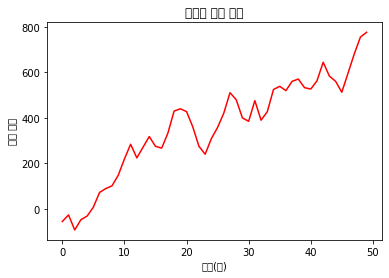

In [9]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

## 나눔폰트 설치 후 리빌드

In [10]:
matplotlib.font_manager._rebuild()

## 설치된 폰트 찍어보기

In [11]:
# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
fm.findSystemFonts(fontpaths=None, fontext='ttf')[:10]

['C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicExtraBold.ttf',
 'C:\\Windows\\Fonts\\times.ttf',
 'C:\\Windows\\Fonts\\arial.ttf',
 'C:\\Windows\\Fonts\\mmrtext.ttf',
 'C:\\Windows\\Fonts\\comici.ttf',
 'C:\\Windows\\Fonts\\gulim.ttc',
 'C:\\Windows\\Fonts\\wingding.ttf',
 'C:\\Windows\\Fonts\\trebucbi.ttf',
 'C:\\Windows\\Fonts\\segmdl2.ttf',
 'C:\\Windows\\Fonts\\Candarab.ttf']

In [12]:
# matplotlib 폰트
fm.fontManager.ttflist[:10]

[<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>,
 <Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>,
 <Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>,
 <Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>,
 <Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>,
 <Font 'cmex10' (cmex10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>,
 <Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>,
 <Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>]

## 나눔폰트를 사용할 것이기 때문에 이름에 'Nanum'이 들어간 것만 출력

In [13]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name][:10]

[('NanumGothic',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumBarunGothic',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'),
 ('NanumGothic Eco',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicEcoR.ttf'),
 ('NanumSquare',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareR.ttf'),
 ('NanumSquare_ac',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'),
 ('NanumGothic',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'),
 ('NanumSquareRound',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareRoundL.ttf'),
 ('NanumGothicCoding',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCodingBold.ttf'),
 ('NanumGothicCoding',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf'),
 ('NanumBarunpen',
  'C:\\User

## 폰트 사용 방법

### fname 옵션을 사용하는 방법

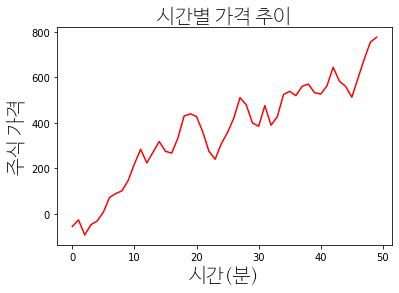

In [14]:
# 한글 들어가는 곳마다 모두 설정해줘야 함
path = 'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf'
fontprop = fm.FontProperties(fname = path, size = 20)
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

### matplotlib.rcParams[]로 전역 글꼴 설정

In [15]:
print('설정 파일 위치 : ', matplotlib.matplotlib_fname())

설정 파일 위치 :  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [16]:
# 기본 설정 읽기
# size, family
print('# 설정되어 있는 폰트 사이즈')
print(plt.rcParams['font.size'])
print('# 설정되어 있는 폰트 글꼴')
print(plt.rcParams['font.family'])

# 설정되어 있는 폰트 사이즈
10.0
# 설정되어 있는 폰트 글꼴
['sans-serif']


In [19]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (14, 4)

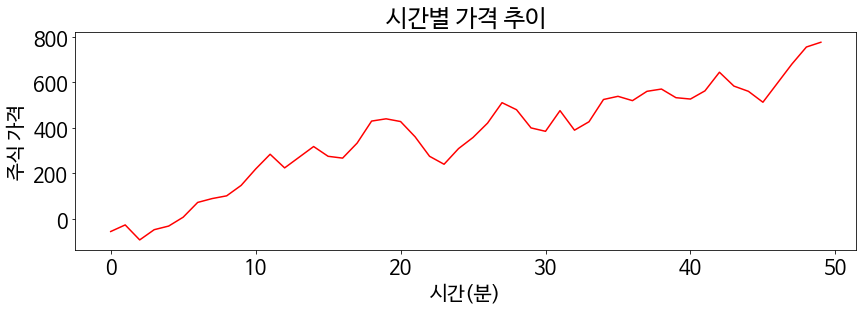

In [20]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.show()